# ENERGY THEFT PREDICTION USING MULTILAYER PERCEPTRON (MLP), SUPPORT VECTOR MACHINE AND THE RANDOM FOREST ENSEMBLE.

## IMPORTING REQUIRED LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

#### READING THE DATASETS CONTAINING THE THREE YEARS ENERGY READINGS AND LABEL (2014 - 2016)

In [5]:
df1 = pd.read_csv("data.csv")

In [6]:
df1.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,B32AC8CC6D5D805AC053557AB05F5343,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


#### DATA PREPROCESSING

In [8]:
df1.isna().sum()

CONS_NO          0
FLAG             0
2014/1/1     16502
2014/1/10    16460
2014/1/11    16461
             ...  
2016/9/5       499
2016/9/6       522
2016/9/7       405
2016/9/8       328
2016/9/9       345
Length: 1036, dtype: int64

In [9]:
df = df1.fillna(0)

In [10]:
df.head()

,CONS_NO,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,0387DD8A07E07FDA6271170F86AD9151,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,01D6177B5D4FFE0CABA9EF17DAFC2B84,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4B75AC4F2D8434CFF62DB64D0BB43103,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,B32AC8CC6D5D805AC053557AB05F5343,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,EDFC78B07BA2908B3395C4EB2304665E,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


In [11]:
df.isna().sum()

CONS_NO      0
FLAG         0
2014/1/1     0
2014/1/10    0
2014/1/11    0
            ..
2016/9/5     0
2016/9/6     0
2016/9/7     0
2016/9/8     0
2016/9/9     0
Length: 1036, dtype: int64

In [12]:
df = df.drop("CONS_NO", axis=1)

In [13]:
df.head()

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
0,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.12,9.96,16.92,7.60,27.22,18.05,26.47,18.75,17.84,14.92
1,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.50,9.99,11.78,18.59,26.80,18.57,14.59,12.82,19.37,15.92
4,1,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,...,17.77,10.37,15.32,13.51,12.23,14.68,16.35,18.14,18.41,17.31


#### CALCULATE CONTROL LIMITS

In [15]:
mean = df.mean()

In [16]:
std = df.std()

In [17]:
UCL = mean + 3 * std

In [18]:
LCL = mean - 3 * std

In [19]:
print(f"UCL: {UCL}, LCL: {LCL}, Mean: {mean}")

UCL: FLAG           0.923379
2014/1/1      85.068359
2014/1/10     98.683930
2014/1/11     94.607873
2014/1/12     80.085941
                ...    
2016/9/5     312.495191
2016/9/6     364.447849
2016/9/7     321.412268
2016/9/8     311.618414
2016/9/9     331.079302
Length: 1035, dtype: float64, LCL: FLAG          -0.752747
2014/1/1     -76.314693
2014/1/10    -90.178441
2014/1/11    -86.310752
2014/1/12    -71.421333
                ...    
2016/9/5    -289.799799
2016/9/6    -341.422200
2016/9/7    -298.983356
2016/9/8    -289.757779
2016/9/9    -309.870108
Length: 1035, dtype: float64, Mean: FLAG          0.085316
2014/1/1      4.376833
2014/1/10     4.252745
2014/1/11     4.148560
2014/1/12     4.332304
               ...    
2016/9/5     11.347696
2016/9/6     11.512825
2016/9/7     11.214456
2016/9/8     10.930317
2016/9/9     10.604597
Length: 1035, dtype: float64


### VIEWING THE DISTRIBUTION OF THE LABEL

In [21]:
label_counts = df["FLAG"].value_counts()

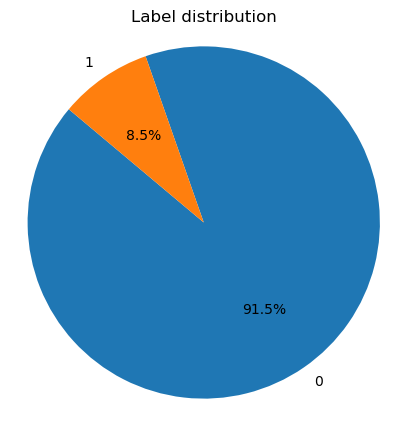

In [22]:
plt.figure(figsize=(5,5))
plt.pie(label_counts, labels=label_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("Label distribution")
plt.axis("equal")
plt.show()

#### TARGET VARIABLE DISTRIBUTION

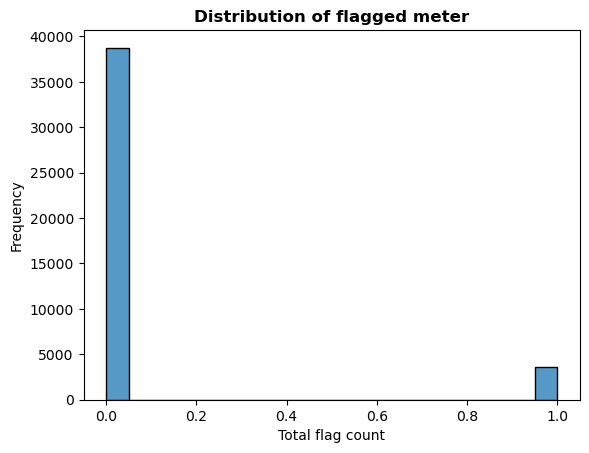

In [24]:
sns.histplot(df["FLAG"], bins=20)
plt.title("Distribution of flagged meter", weight ="bold")
plt.xlabel('Total flag count')
plt.ylabel('Frequency')
plt.show()

In [25]:
df.describe()

,FLAG,2014/1/1,2014/1/10,2014/1/11,2014/1/12,2014/1/13,2014/1/14,2014/1/15,2014/1/16,2014/1/17,...,2016/9/28,2016/9/29,2016/9/3,2016/9/30,2016/9/4,2016/9/5,2016/9/6,2016/9/7,2016/9/8,2016/9/9
count,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,...,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000,42372.000000
mean,0.085316,4.376833,4.252745,4.148560,4.332304,6.431199,4.415065,4.490118,4.380627,4.184928,...,8.454924,9.109217,10.642681,9.655718,11.050613,11.347696,11.512825,11.214456,10.930317,10.604597
std,0.279354,26.897175,31.477062,30.153104,25.251212,450.765847,27.365478,28.821692,29.085874,23.883813,...,51.261215,56.476895,87.570811,61.133007,93.755277,100.382498,117.645008,103.399271,100.229365,106.824902
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.240000,0.600000,0.760000,0.550000,0.770000,0.790000,0.790000,0.810000,0.810000,0.800000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.030000,4.510000,4.910000,4.600000,5.040000,5.010000,5.060000,5.020000,4.950000,4.860000
75%,0.000000,5.080000,4.560000,4.640000,5.050000,5.100000,5.040000,5.240000,4.990000,5.000000,...,9.000000,9.240000,10.650000,9.512500,11.282500,11.300000,11.490000,11.200000,10.670000,10.222500
max,1.000000,3318.000000,3966.000000,4392.000000,3414.000000,92713.900000,3167.000000,3960.000000,3654.000000,3306.000000,...,6324.000000,6990.000000,14640.000000,6672.000000,16320.000000,17100.000000,21210.000000,17940.000000,16710.000000,18570.000000


## NEURAL NETWORK IMPLEMENTATION

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.transforms import ToTensor
from torchvision import transforms
from tqdm.auto import tqdm
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.data import Dataset, DataLoader, random_split, WeightedRandomSampler
import torch.nn.functional as F

### CREATE A CUSTOM DATASET CLASS

In [29]:
class Custom_Dataset(Dataset):
    def __init__(self, X, y, transform = None):
        self.X = X
        self.y = y
        self.transform = transform
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]  

In [30]:
# Define normalization transform
transform = transforms.Compose(
    [
    transforms.ToTensor(),
]
)

In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## DATA  SPLITTING FOR NEURAL NETWORK AND STANDARDIZATION

In [33]:
# separates the dependent and the independent variables
X = df.drop("FLAG", axis = 1).values #independent columns
y = df["FLAG"].values #target

In [34]:
# splits the data into train sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=46)

In [35]:
# splits the data into test and validation sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=46)

In [36]:
# scaling the faetures
scaler = StandardScaler()

In [37]:
X_train = scaler.fit_transform(X_train)

In [38]:
X_test = scaler.transform(X_test)

In [39]:
X_val = scaler.transform(X_val)

#### CONVERT TO PYTORCH TENSORS

In [41]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.float32)

#### DATASET INITIALIZATION

In [43]:
train_dataset = Custom_Dataset(X_train, y_train, transform=transform)

In [44]:
test_dataset = Custom_Dataset(X_test, y_test, transform=transform)

In [45]:
val_dataset = Custom_Dataset(X_val, y_val, transform=transform)

#### DATALOADER

In [47]:
train_loader = DataLoader(train_dataset, 
                          batch_size=32, 
                          shuffle=True
                         )

In [48]:
test_loader = DataLoader(test_dataset,
                        batch_size=32,
                        shuffle=False
                        )

In [49]:
val_loader = DataLoader(val_dataset,
                        batch_size=32,
                        shuffle=True
                        )

### BUILDING THE MLP ARCHITECTURE

In [51]:
class MultiLayerPerceptron(nn.Module):
    def __init__(self, input_dim, output_dim, final_activation):
        super(MultiLayerPerceptron, self). __init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_dim)
        self.final_activation = final_activation
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        if self.final_activation == "sigmoid":
            x = torch.sigmoid(self.fc3(x))
        else:
            x = self.fc3(x) # regression linear output
        return x

In [52]:
model = MultiLayerPerceptron(input_dim=X_train.shape[1], output_dim=1, final_activation="sigmoid")

#### TRAINING AND VALIDATION

In [54]:
train_accuracies = []
val_accuracies = []

In [55]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=10):
    model.train()
    correct_train = 0
    total_train = 0
    for epoch in range(num_epochs):
        for inputs, targets in train_loader:
            inputs = inputs.to(device, dtype = torch.float32)
            targets = targets.to(device, dtype = torch.float32)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets.view(-1, 1))
            loss.backward()
            optimizer.step()
            
            # accuracy
            _, predicted = torch.max(outputs, 1)
            total_train += targets.size(0)
            correct_train += (predicted == targets).sum().item()
            
        train_accuracy = 100 * correct_train / total_train
        train_accuracies.append(train_accuracy)
        
        # VALIDATION PHASE
        model.eval()
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                inputs = inputs.to(device, dtype = torch.float32)
                targets = targets.to(device, dtype = torch.float32)
                outputs = model(inputs)
                loss = criterion(outputs, targets.view(-1, 1))
                
                _, predicted = torch.max(outputs, 1)
                total_val += targets.size(0)
                correct_val += (predicted == targets).sum().item()
        val_accuracy = 100 * correct_val / total_val
        val_accuracies.append(val_accuracy) 
        print(f"Epoch {epoch+1} / {num_epochs}, Loss: {loss.item()}, Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%")        


In [56]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

#### TESTING

In [58]:
def evaluate_model(model, X_test, y_test):
    model.eval()
    predictions_list = []
    labels_list = []

    with torch.no_grad():
        predictions = model(X_test)
        
        if model.final_activation == "sigmoid":
            predictions = torch.round(predictions)
            correct = (predictions == y_test.view(-1, 1)).float().sum()
            accuracy = correct / y_test.shape[0]
            print(f"Accuracy: {accuracy.item() * 100:.2f}%")
        else:
            mse = F.mse_loss(predictions, y_test.view(-1, 1))
            print(f"MSE: {mse.item():.4f}")

        # Append predicted and actual labels to the lists
        predictions_list.extend(predictions.cpu().numpy())
        labels_list.extend(y_test.cpu().numpy())

    return predictions_list, labels_list

#### TRAINING VALIDATION AND TESTING

In [60]:
train_model(model, train_loader, val_loader, criterion, optimizer)

Epoch 1 / 10, Loss: 0.4273633062839508, Train Accuracy: 91.46%, Val Accuracy: 91.58%
Epoch 2 / 10, Loss: 0.07980972528457642, Train Accuracy: 91.46%, Val Accuracy: 91.58%
Epoch 3 / 10, Loss: 0.21549558639526367, Train Accuracy: 91.46%, Val Accuracy: 91.58%
Epoch 4 / 10, Loss: 0.3914598524570465, Train Accuracy: 91.46%, Val Accuracy: 91.58%
Epoch 5 / 10, Loss: 0.3429235517978668, Train Accuracy: 91.46%, Val Accuracy: 91.58%
Epoch 6 / 10, Loss: 0.056727249175310135, Train Accuracy: 91.46%, Val Accuracy: 91.58%
Epoch 7 / 10, Loss: 0.23035964369773865, Train Accuracy: 91.46%, Val Accuracy: 91.58%
Epoch 8 / 10, Loss: 0.0773615688085556, Train Accuracy: 91.46%, Val Accuracy: 91.58%
Epoch 9 / 10, Loss: 0.043849412351846695, Train Accuracy: 91.46%, Val Accuracy: 91.58%
Epoch 10 / 10, Loss: 0.17487367987632751, Train Accuracy: 91.46%, Val Accuracy: 91.58%


In [61]:
predictions, labels = evaluate_model(model, X_test, y_test)

Accuracy: 91.79%


#### VISUALIZATION

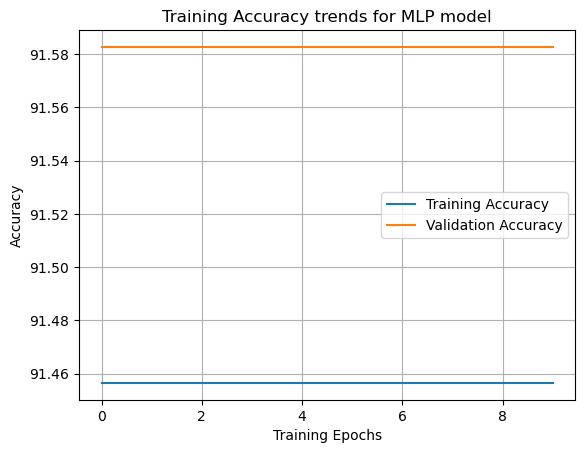

In [63]:
# plot accuracy progress
plt.title("Training Accuracy trends for MLP model")
plt.plot(train_accuracies, label = "Training Accuracy")
plt.plot(val_accuracies, label = "Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.grid(True)
plt.show()

### CLASSIFICATION REPORT

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [66]:
# these are gotten from the sklearn library
accuracy = accuracy_score(labels, predictions)
precision = precision_score(labels, predictions, average = "weighted")
recall = recall_score(labels, predictions, average = "weighted")
f1 = f1_score(labels, predictions, average = "weighted")

In [67]:
report = classification_report(labels, predictions)
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      5810
         1.0       0.62      0.12      0.19       546

    accuracy                           0.92      6356
   macro avg       0.77      0.55      0.58      6356
weighted avg       0.90      0.92      0.89      6356



#### CONFUSION MATRIX FOR NEURAL NETWORK

In [69]:
class_labels = ["yes", "No"]

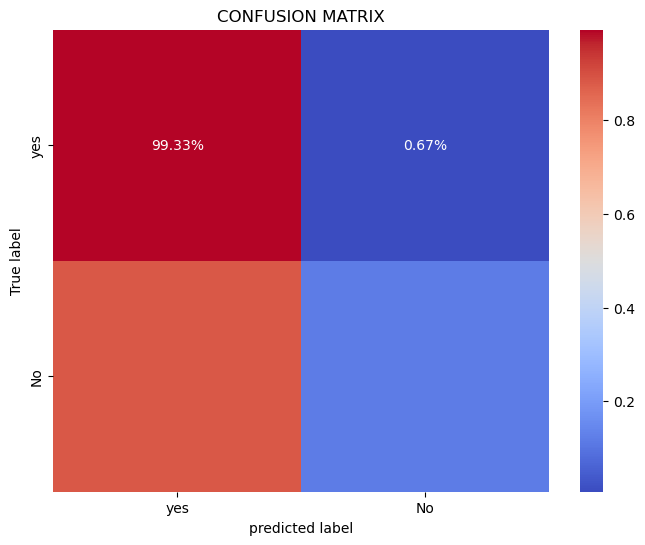

In [70]:
c_matrix = confusion_matrix(labels, predictions)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="coolwarm", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.ylabel("True label")
plt.xlabel("predicted label")
plt.show()

#### ROC CURVE

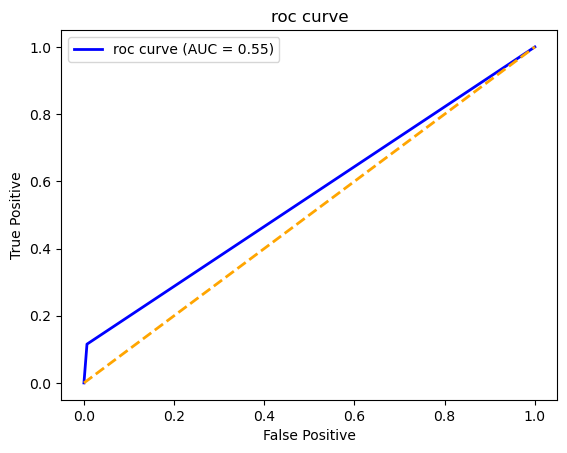

In [72]:
fp, tp, thresholds = roc_curve(labels, predictions)
roc_auc = roc_auc_score(labels, predictions)
plt.figure()
plt.plot(fp, tp, color="blue", lw=2, label="roc curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("roc curve")
plt.legend()
plt.show()

## SUPPORT VECTOR MACHINE

In [74]:
# initialize the support vector model
model = SVC()

In [75]:
model.fit(X_train, y_train)

SVC()

In [76]:
# evaluate the model predictions
y_pred = model.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred)

In [78]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.46%


In [79]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.96      5810
         1.0       0.67      0.01      0.02       546

    accuracy                           0.91      6356
   macro avg       0.79      0.51      0.49      6356
weighted avg       0.89      0.91      0.88      6356



#### CONFUSION MATRIX FOR SVM

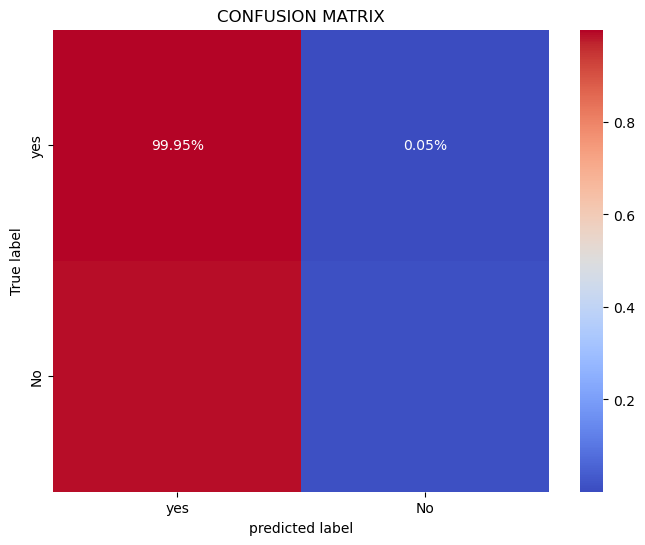

In [81]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="coolwarm", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

#### ROC CURVE FOR SVM

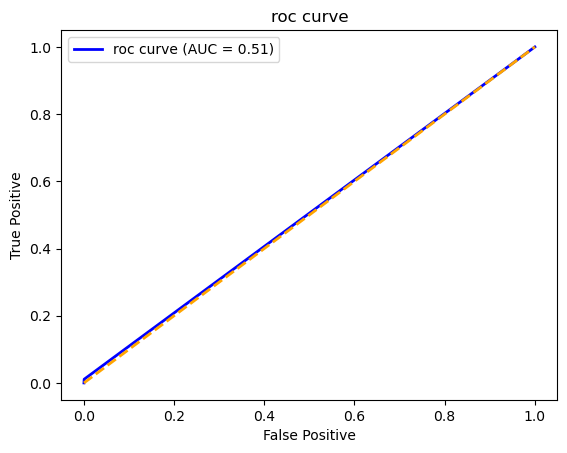

In [83]:
fp, tp, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fp, tp, color="blue", lw=2, label="roc curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("roc curve")
plt.legend()
plt.show()

## (ENSEMBLE) RANDOM FOREST CLASSIFIER

In [85]:
# initialize the random forest classifier
model = RandomForestClassifier(n_estimators=300, random_state=46, max_depth=10)

In [86]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=46)

In [87]:
# evaluate the model predictions
y_pred = model.predict(X_test)

In [88]:
accuracy = accuracy_score(y_test, y_pred)

In [89]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 91.80%


In [90]:
# print the classification report
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      5810
         1.0       0.74      0.07      0.13       546

    accuracy                           0.92      6356
   macro avg       0.83      0.53      0.54      6356
weighted avg       0.90      0.92      0.89      6356



#### CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER

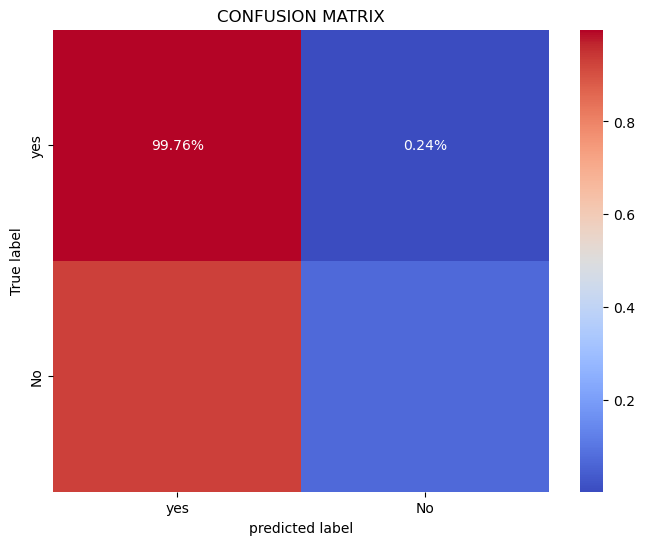

In [92]:
c_matrix = confusion_matrix(y_test, y_pred)
c_matrix_percentage = c_matrix.astype("float") / c_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(c_matrix_percentage, annot=True, cmap="coolwarm", fmt=".2%", cbar=True, xticklabels=class_labels, yticklabels=class_labels)
plt.title("CONFUSION MATRIX")
plt.xlabel("predicted label")
plt.ylabel("True label")
plt.show()

#### ROC CURVE FOR ENSEMBLE

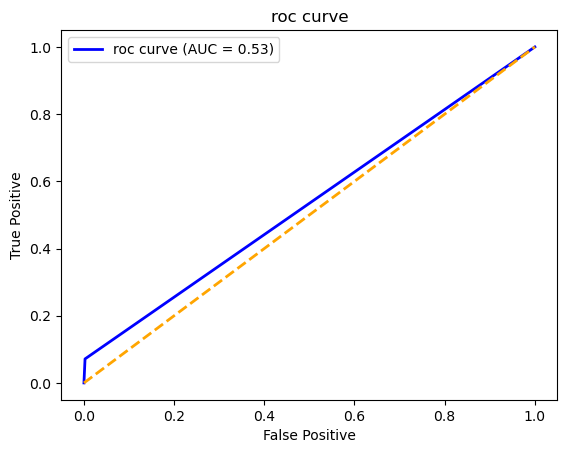

In [94]:
fp, tp, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fp, tp, color="blue", lw=2, label="roc curve (AUC = {:.2f})".format(roc_auc))
plt.plot([0, 1], [0, 1], color="orange", lw=2, linestyle="--")
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("roc curve")
plt.legend()
plt.show()

#### VISUALIZE THE ACCURACIES

In [96]:
from matplotlib.ticker import MaxNLocator

In [97]:
data = {"Models" : ["Multilayer Perceptron", "Support vector machine", "Random Forest classifier"],
        "Accuracy" : [90.94, 91.49, 91.71]}

In [98]:
df = pd.DataFrame(data)

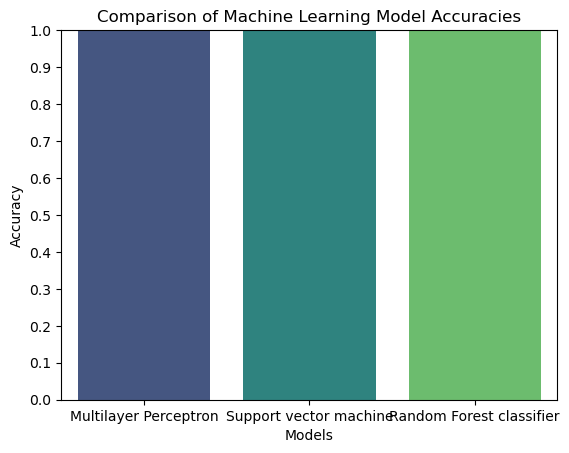

In [99]:
# plotting
sns.barplot(x = "Models", y = "Accuracy", data = df, palette="viridis")
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=10))
plt.ylim(0, 1)
plt.title("Comparison of Machine Learning Model Accuracies")
plt.show()